# One dimensional Neural Network

In [2]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 2, Activation: absolute, Weights: (2, 1), Biases: (2, 1)
Layer: L2, Neurons: 2, Activation: relu, Weights: (2, 2), Biases: (2, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 2), Biases: (1, 1)


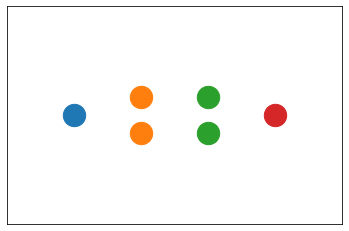

In [3]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(2, activation = 'absolute' )
mynetwork.add_layer(2, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

# Simple Prediction

# Load Dataset

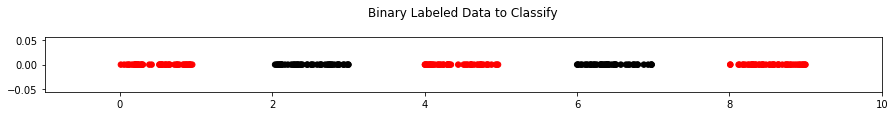

In [4]:
X,Y,C = nregion.load_data(regions = 5)
nregion.graph(X,Y)

In [5]:
C

[2.5, 6.5]

# N region initialization

In [6]:
import numpy as np

In [7]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

array([[1.],
       [1.]])

In [8]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
mynetwork.layers['L1']['biases']

array([[2.5],
       [6.5]])

In [9]:
mynetwork.layers['L2']['weights'].shape

(2, 2)

In [14]:
mynetwork.layers['L2']['weights'] = -np.identity(2, dtype=None)
mynetwork.layers['L2']['weights']

array([[-1., -0.],
       [-0., -1.]])

In [15]:
mynetwork.layers['L2']['biases'] = np.zeros_like(mynetwork.layers['L2']['biases'])-5
mynetwork.layers['L2']['biases']

array([[-5.],
       [-5.]])

In [16]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1.]])

In [17]:
mynetwork.layers['L3']['biases'] = 0
mynetwork.layers['L3']['biases']

0

# Graph the decision boundary

In [18]:
def prediction(x):
    return mynetwork.predict(x)-0.5

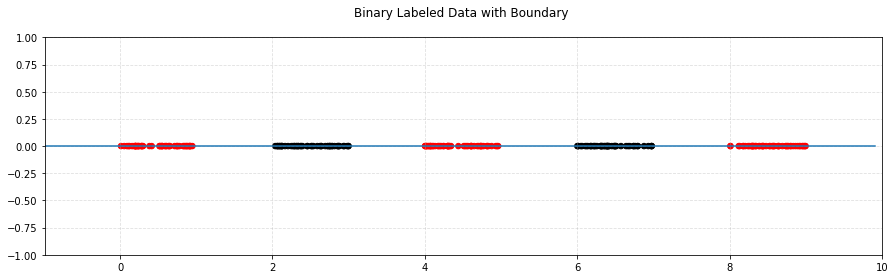

In [19]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = prediction)

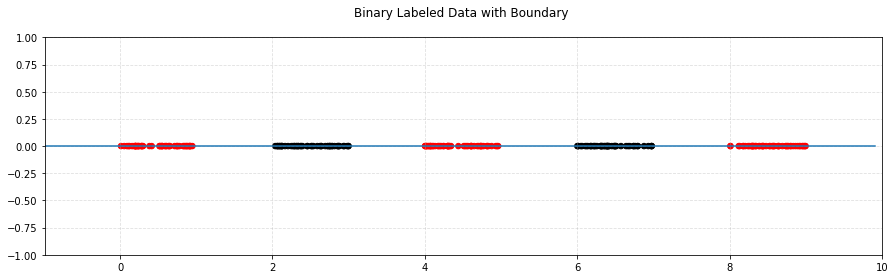

In [20]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = mynetwork.decision)

# Backward pass illusrated

In [17]:
print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.3f}")

Loss: 0.693


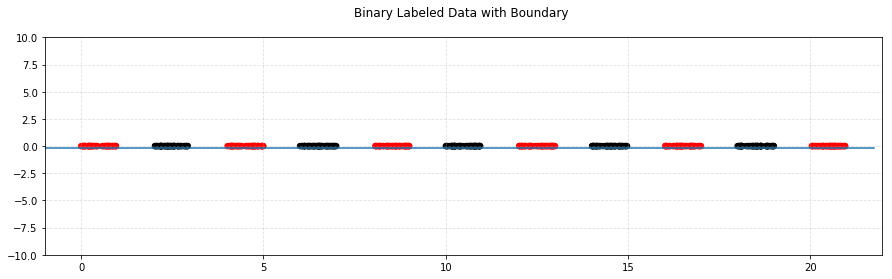

Loss: 0.689


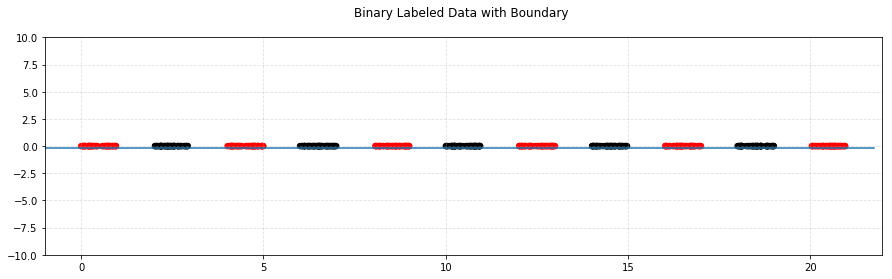

Loss: 0.689


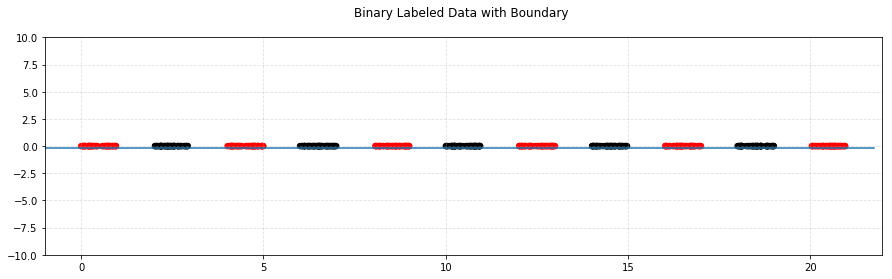

Loss: 0.689


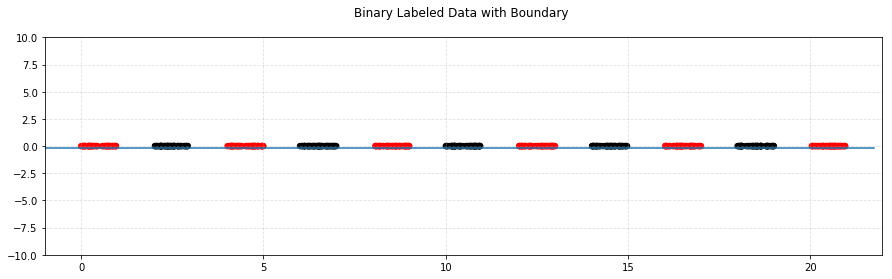

Loss: 0.689


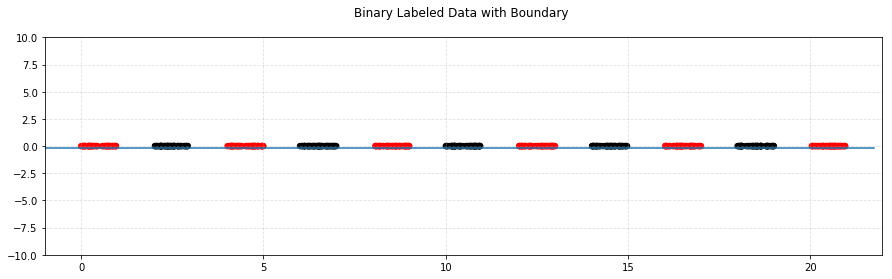

Loss: 0.689


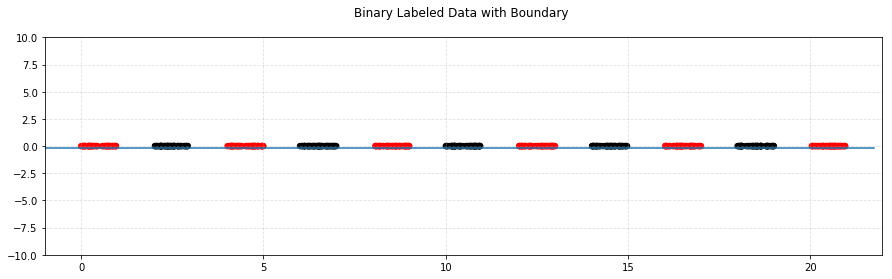

Loss: 0.689


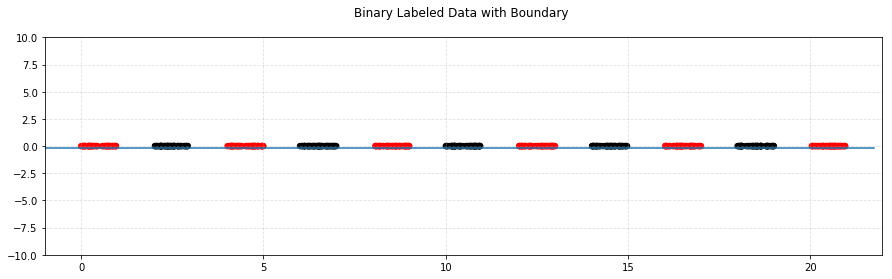

Loss: 0.689


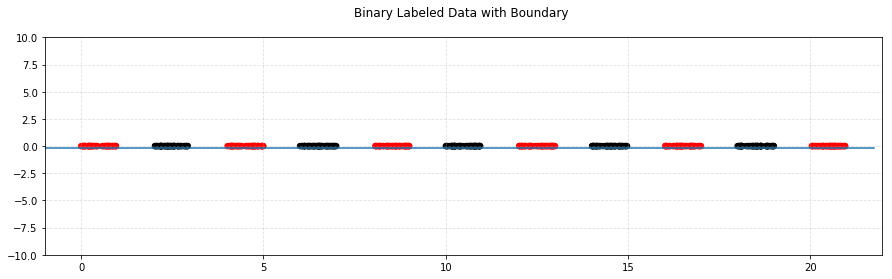

Loss: 0.689


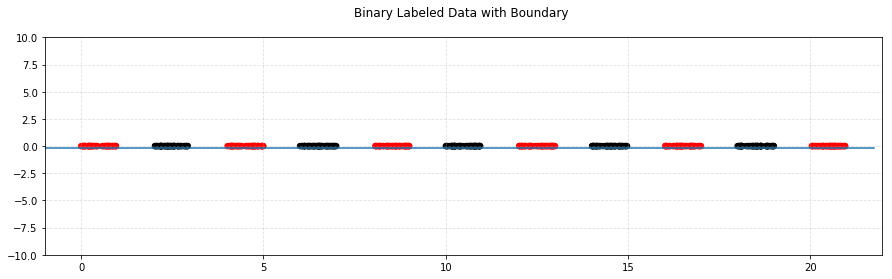

Loss: 0.689


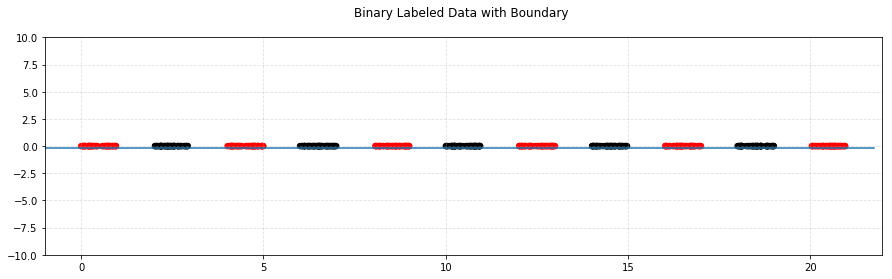

Loss: 0.689


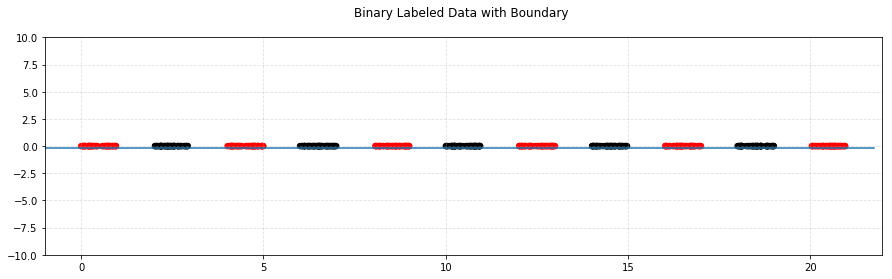

Loss: 0.689


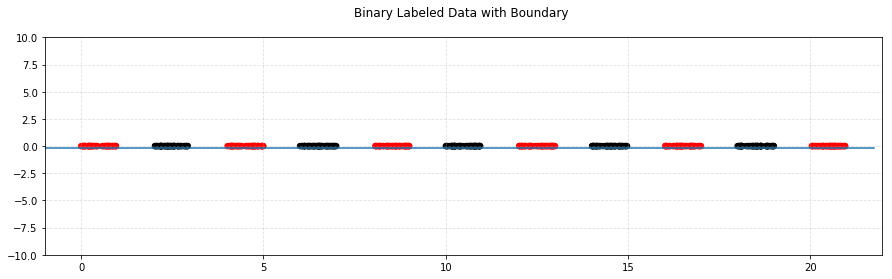

Loss: 0.689


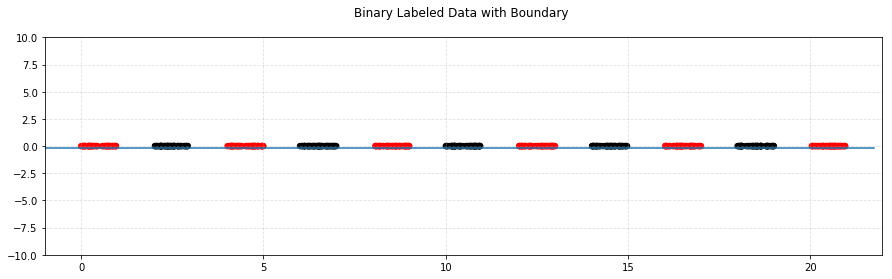

Loss: 0.689


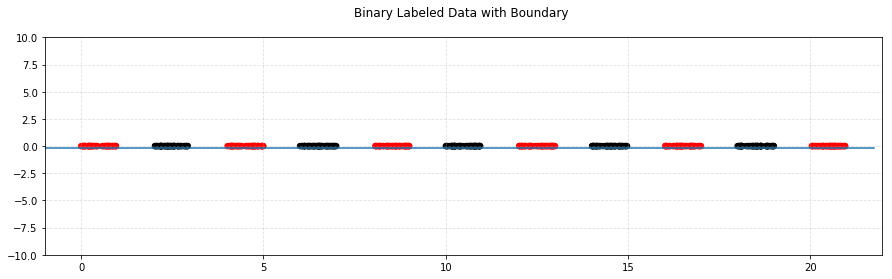

Loss: 0.689


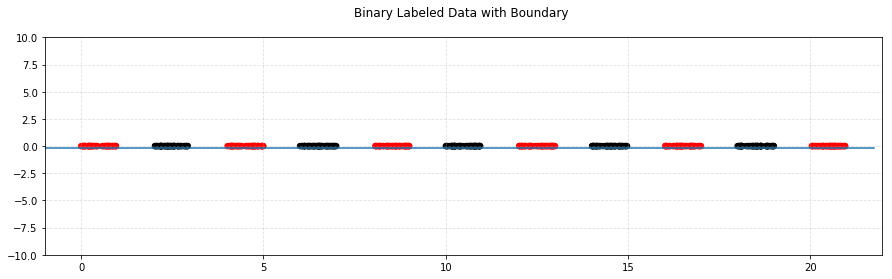

Loss: 0.689


KeyboardInterrupt: 

In [18]:
import matplotlib.pyplot as plt
decision = mynetwork.decision
for n in range(100):
    mynetwork.train(X, Y, learning_rate=0.05, num_epochs=1000)
    plt.figure(figsize=(15,4))
    plt.scatter(X[:,0], np.zeros(X[:,0].shape), c=Y, cmap='flag', s = 30)

    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X[:,0])-1, max(X[:,0])+1, (max(X[:,0])-1 - min(X[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X[:,0])-1, max(X[:,0])+1)
    x = np.array(range(100))
    plt.pause(0.1)
    plt.show()
    plt.close()
    print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.3f}")

